<a href="https://colab.research.google.com/github/Zw788/Advent-of-Code-2024/blob/main/Advent_of_Code_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#s_time = time.time()

#print("spent time : {0}s".format(time.time()- s_time))
import numpy as np
import time
import itertools as iter
from collections import Counter
import bisect
import re
import matplotlib.pyplot as plt

### Day 1

I decided to write the quick_sort() for practice instead of using sorted().

In [ ]:
ids='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()


def quick_sort(x=None):
  que=[[0,len(x)]]

  res=x+[]

  while que:
    intval=que.pop()

    if intval[1]-intval[0]<2:
      continue
    else:
      anchor=res[intval[0]]
      lo=[]
      hi=[]
      t=1
      #intval= [0,len(x)]
      for i in range(intval[0]+1,intval[1]):
        if res[i] < anchor:
          lo+=[res[i]]
        elif res[i] > anchor:
          hi+=[res[i]]
        else:
          t+=1
      res[intval[0]:intval[1]]=lo+t*[anchor]+hi
      que += [[intval[0],intval[0]+len(lo)]]+[[intval[0]+len(lo)+t,intval[1]]]

  return (res)

l1=[]
l2=[]
for i in ids:
  l1+= [int( i.split('   ')[0])]
  l2+= [int( i.split('   ')[1])]

A=Counter(l2)
c=0
for i in l1:
  c+=A[i]*i

print("Part 1: " f'{sum( abs( np.array(quick_sort(l1)) - np.array(quick_sort(l2)) ))}' )
print("Part 2: " f'{c}' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 1590491
Part 2: 22588371
spent time : 0.0662529468536377s


### Day 2

Mainly got stuck on the edges cases of first 3 levels of the report. There's probably a simpler way to check them.

In [ ]:
# @title
A='''
'''.split( "\n" )

In [ ]:
s_time = time.time()
c2=len(A)
c1=0

for i in range(len(A)):
  x=[int(k) for k in A[i].split(" ")]

  c1 += all(abs(abs(np.diff(x)) - 2) <= 1) & (not sum(np.diff(x) > 0)%(len(x)-1))


  if abs(x[1]-x[0]) <= 3 and abs(x[2]-x[1]) <= 3 and (x[1]-x[0])*(x[2]-x[1]) > 0:
    sgn=x[1]-x[0]
    j0=x[0]
    t=0
  elif abs(x[2]-x[0]) <= 3 and abs(x[3]-x[2]) <= 3 and (x[2]-x[0])*(x[3]-x[2]) > 0:
    sgn=x[2]-x[0]
    j0=x[0]
    t=1
  elif abs(x[1]-x[0]) <= 3 and abs(x[3]-x[1]) <= 3 and (x[1]-x[0])*(x[3]-x[1]) > 0:
    sgn=x[1]-x[0]
    j0=x[0]
    t=0
  else:
    sgn=x[2]-x[1]
    j0=x[1]
    t=1

  for j1 in x[t+1:]:
    if (j1-j0)*sgn > 0 and abs(j1-j0) <= 3:
      j0=j1
      continue
    elif t==0:
      t=1
      continue
    else:
      c2-=1
      break


print("Part 1: " f'{ c1 }' )
print("Part 2: " f'{ c2 }' )

print("spent time : {0}s".format(time.time()- s_time))


Part 1: 236
Part 2: 308
spent time : 0.07229232788085938s


### Day 3

Part 2 is similar to part 1 with a few extra conditions, mainly using variable hist to keep track of recently visited letters during the loop.

In [ ]:
# @title
S='''
'''

In [ ]:
s_time = time.time()

mul=lambda a,b: a*b
res=0
goodinput=set("(0123456789,")
code="   "
status=1
hist="1234567"

def dos():
  global code
  global res

  if "mul" in code:
    if i == ")":
      try:
        res+=eval(code+i)
      except:
        pass
      code="   "
    elif i in goodinput:
      code += i
    else:
      code="  "+i
  else:
    code=code[1:]+i
  return


for i in S:
  dos()
print("Part 1: " f'{ res }' )

res=0
code="   "

for i in S:
  hist=hist[1:]+i

  if "do()" in hist:
    status=1
    hist="1234567"
  elif "don't()" in hist:
    status=0
    hist="1234567"

  if status:
    dos()

print("Part 1: " f'{ res }' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 173785482
Part 1: 83158140
spent time : 0.05340123176574707s


### Day 4

Decide to run four loops for part 1 instead of checking the four cases in one loop, and tried to write part 2 in one line.

In [ ]:
# @title
xword=list('''
'''.split('\n') )

In [ ]:
s_time = time.time()

c=0
word={"XMAS", "SAMX"}

for i in range(len(xword)):
  scan="1234"
  for j in range(len(xword[0])):
    scan=scan[1:]+xword[i][j]
    if scan in word:
      c+=1

for i in range(len(xword)):
  scan="1234"
  for j in range(len(xword[0])):
    scan=scan[1:]+xword[j][i]
    if scan in word:
      c+=1

diag=list(range(len(xword)))+list(range(len(xword)-2,-1,-1))

for i in range(2*len(xword)-1): #/////////
  scan="1234"
  for j in range(diag[i]+1):
    scan=scan[1:]+xword[ min(i,len(xword)-1)-j ][ i-min(i,len(xword)-1)+j ]
    if scan in word:
      c+=1

for i in range(2*len(xword)-1): #\\\\\\
  scan="1234"
  for j in range(diag[i]+1):
    scan=scan[1:]+xword[ j+max((i-len(xword)+1),0)  ][ j+max((i-len(xword)+1),0) - (i-len(xword)+1) ]
    if scan in word:
      c+=1

print("Part 1: " f'{ c }' )
print("Part 2: "
      f'''{sum([xword[i][j]=="A" and
            ''.join( np.append(xword[i-1][[j-1,j+1]],xword[i+1][[j+1,j-1]]) ) in {'MMSS','MSSM','SSMM','SMMS'}
            for i in range(1,len(xword)-1)
            for j in range(1,len(xword[0])-1) ])}''' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 2642
Part 2: 1974
spent time : 0.3533167839050293s


### Day 5

Key insight is that the input has ordering for every unique pairs of number part 2 only requires the mid point. So no order sorting is required.

In [ ]:
# @title
_dirt='''
'''.split('\n')

In [ ]:
s_time = time.time()
shit=dict()

for mud in _dirt:
  sludge=mud.split('|')
  try:
    shit[sludge[1]]|={sludge[0]}
  except:
    shit[sludge[1]]={sludge[0]}

garbage1=0

for dirt in trash:
  dirt=dirt.split(',')
  for i in range(len(dirt)-1):
    if shit[dirt[i]] & set(dirt[i+1:]):
      dirt=[0]
      break

  garbage1 += int(dirt[len(dirt)//2])

print("Part 1: " f'{ garbage1 }' )

###############################################################

garbage2=0

for dirt in trash:
  dirt=set(dirt.split(','))
  for i in dirt:
    if len(shit[i] & dirt)==len(dirt)//2:
     garbage2+= int(i)
     break
print("Part 2: " f'{ garbage2-garbage1 }' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 6041
Part 2: 4884
spent time : 0.049959659576416016s


### Day 6

Mainly used bisect() to go thru obstructions instead of following each step in the loop.

In [ ]:
# @title

s_time = time.time()
map='''
'''.split('\n')[1:]

isort=[[]]*len(map)
jsort=[[]]*len(map)
keydict=dict()
c=0
for i in range(len(map)):
  for j in range(len(map[0])):
    if map[i][j]=="#":
      isort[i]=sorted(isort[i]+[j]) #elements in i row sorted by j
      jsort[j]=sorted(jsort[j]+[i]) #element in j column sorted by i
      keydict|={(i,j):c}
      c+=1
    elif map[i][j]=="^":
      pos=np.array([i,j])
keylist=list(keydict.keys())

################################################################  Part 1
d=np.array([-1,0])
hp=[pos+0]
while all(pos+d >= 0) and all(pos+d < len(map)):
  if map[(pos+d)[0]][(pos+d)[1]] == "#":
    d=d.dot(np.array([[0,-1],[1,0]]))
  pos+=d
  hp+=[pos+0]
#print(len(hp))
print("Part 1:" ,len(set([tuple(k) for k in hp])))

################################################################ Part 2

class newmap:
  def __init__(self, obs=None, d=None): #obs=(i,j) coordinate of new stone, d={0,1,2,3}

    self.jst=jsort+[]
    self.ist=isort+[]
    self.kdict=keydict|{}
    self.klist=keylist+[]
    self.d=d+0
    self.obs=obs #np.array

    self.jst[self.obs[1]]=sorted(self.jst[self.obs[1]]+[self.obs[0]])
    self.ist[self.obs[0]]=sorted(self.ist[self.obs[0]]+[self.obs[1]])
    self.klist+=[tuple(self.obs)]
    self.kdict[tuple(self.obs)]=len(self.klist)-1

  def next(self,p=None, d=None): #p is position of stone, d is {0,1,2,3} any of four directions
    d=[(-1,0),(0,1),(1,0),(0,-1)][d]
    if d[0]:
      i=bisect.bisect(self.ist[p[0]-d[0]],p[1])-(d[0]==1)
      if i < 0 or i >= len(self.ist[p[0]-d[0]]):
        return -69
      else:
        return self.kdict[(p[0]-d[0] ,self.ist[p[0]-d[0]][i])]
    else:
      i=bisect.bisect(self.jst[p[1]-d[1]],p[0])-(d[1]==-1)
      if i < 0 or i >= len(self.jst[p[1]-d[1]]):
        return -69
      else:
        return self.kdict[(self.jst[p[1]-d[1]][i] ,p[1]-d[1] )]

  def isloop(self):

    hist=set()
    n=self.next(self.obs, self.d)
    while n >= 0 and (n,self.d) not in hist:
      hist|={(n,self.d)}
      #print(keylist[n],d)
      self.d=(self.d+1)%4
      n=self.next(np.array(self.klist[n]),self.d)

    return (n,self.d) in hist


stone={tuple(hp[0])}
c=0
for i in range(len(hp)-1):
  pos=hp[i]
  d=[(-1,0),(0,1),(1,0),(0,-1)].index(tuple(hp[i+1]-pos))
  #print(pos,d)
  if tuple(hp[i+1]) not in stone :
    stone|={tuple(hp[i+1])}
    c+=newmap(hp[i+1],d).isloop()

print("Part 2:",c)

e_time = time.time()
print("spent time : {0}s".format(e_time - s_time))

Part 1: 5162
Part 2: 1909
spent time : 1.1032581329345703s


### Day 7

Since all numbers are in integers, doing the search backward can eliminate a lot of possibilities.


In [ ]:
# @title
eq='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
res=[]
val=[]
for i in eq:
  res+=[(i.split(': ')[0])]
  val+=[(i.split(': ')[1])]


c=0

for l in range(len(res)):
  x=val[l].split(' ')
  s=set()
  z=int(x[-1])
  if not int(res[l])%z:
    s|={int(res[l])//z}

  if int(res[l]) > z:
    s|= {int(res[l])-z}
#print(s)

  for i in x[1:-1][::-1]:
    t=set()
    for j in s:
      z=int(i)
      if not j%z:
        t|={j//z}
      if j > z:
        t|= {j-z}
    #print(t)
    s=t|set()
    if len(s)==0:
      break
    else:
      continue

  if int(x[0]) in s:
    c+=int(res[l])
print("Part 1: " f'{ c }' )

###################################################
c=0

for l in range(len(res)):
  x=val[l].split(' ')
  s=set()
  z=int(x[-1])
  if not int(res[l])%z:
    s|={int(res[l])//z}

  if res[l][-len(str(z)):] == str(z) and len(str(z)) < len(res[l]):
    s|={int(res[l][:-len(str(z))])}
  elif str(z)==res[l]:
    s|={0}

  if int(res[l]) > z:
    s|= {int(res[l])-z}
#print(s)

  for i in x[1:-1][::-1]:
    t=set()
    for j in s:
      z=int(i)
      if not j%z:
        t|={j//z}

      if str(j)[-len(str(z)):] == str(z) and len(str(z)) < len(str(j)):
        t|={int( str(j)[ : -1*len(str(z)) ] )}
      elif str(z)==str(j):
        t|={0}

      if j > z:
        t|= {j-z}
    #print(t)
    s=t|set()
    if len(s)==0:
      break
    else:
      continue

  if int(x[0]) in s:
    c+=int(res[l])
print("Part 2: " f'{ c }' )
print("spent time : {0}s".format(time.time()- s_time))

Part 1: 2314935962622
Part 2: 401477450831495
spent time : 0.2595224380493164s


### Day 8

Calculate the position of x and y coordinates independently.

In [ ]:
# @title
map='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

antennas = dict()
block=set()
for i in range(len(map)):
  for j in range(len(map[0])):
    if map[i][j] != '.':
      block|={(i,j)}
      if antennas.get(map[i][j]):
        antennas[map[i][j]]|={(i,j)}
      else:
        antennas[map[i][j]]={ (i,j) }
    else:
      continue

def nodes50(a=None,b=None):
  d=np.array(a)-np.array(b)
  res=set()

  if all(np.array(a)+d <= 49) and all(np.array(a)+d >= 0) :
    res|={tuple(np.array(a)+d)}

  if all(np.array(b)-d <= 49) and all(np.array(b)-d >= 0):
    res|={tuple(np.array(b)-d)}

  return res

part1=set()

for k in antennas:
  for j in iter.combinations(antennas[k],2):
    part1|= nodes50(j[0],j[1])
print("Part 1: " f'{ len(part1) }' )

def lines50(a=None,b=None):
  d=np.array(a)-np.array(b)
  res=set()

  while all(np.array(a)+d <= 49) and all(np.array(a)+d >= 0) :
    res|={tuple(np.array(a)+d)}
    a=np.array(a)+d

  while all(np.array(b)-d <= 49) and all(np.array(b)-d >= 0):
    res|={tuple(np.array(b)-d)}
    b=np.array(b)-d

  return res

part2=set()

for k in antennas:
  for j in iter.combinations(antennas[k],2):
    part2|= lines50(j[0],j[1])
part2|=block

print("Part 2: " f'{ len(part2) }' )
print("spent time : {0}s".format(time.time()- s_time))

Part 1: 369
Part 2: 1169
spent time : 0.10308432579040527s


### Day 9

Using python's bisect() functions to search for file's ids position saves a lot of time.

In [ ]:
# @title
diskmap='''
'''[1:-1]

In [ ]:
s_time = time.time()
idx=0
empty_pos=[]
num_pos=[]
ids=[]

opn_sp=[[]]*9 #ith element is ARRAY of empty spaces with length i, kth element of array is position of first empty space, 1-indexed
file_pos=[] #idx positions of given file


for i in range(0,len(diskmap)-1,2):
  num_pos+=list ( range( idx,idx+int(diskmap[i]) ) )
  file_pos+=[list(range(idx,idx+int(diskmap[i])))]
  idx+=int(diskmap[i])
  ids+=[i//2]*int(diskmap[i])

  if int(diskmap[i+1]) > 0:
    opn_sp[int(diskmap[i+1])-1]= opn_sp[int(diskmap[i+1])-1] + [idx]
  empty_pos+=list ( range( idx,idx+int(diskmap[i+1]) ) )
  idx+=int(diskmap[i+1])

num_pos+=list ( range( idx,idx+int(diskmap[-1]) ) )
file_pos+=[list(range(idx,idx+int(diskmap[ -1 ])))]
idx+=int(diskmap[-1])
ids+=[i//2+1]*int(diskmap[-1])

total_ids=len(ids)
num_endpos=bisect.bisect_left(num_pos,total_ids-1)

print("Part 1: " f'{ np.dot(num_pos[:num_endpos+1],ids[:num_endpos+1]) + np.dot(empty_pos[:total_ids-num_endpos-1],ids[num_endpos+1:][::-1]) }' )


c=0
for i in range(len(file_pos)-1,-1,-1):
  leftspot=[ [opn_sp[k][0],k+1] for k in range(9) if k >= len(file_pos[i])-1 and opn_sp[k] ] #[idx of spot, length of space]
  if leftspot:
    leftspot=sorted(leftspot)[0]
    if leftspot[0] < file_pos[i][0]:
      file_pos[i]=list( range(leftspot[0],leftspot[0]+len(file_pos[i])) )
      diff=leftspot[1] - len(file_pos[i])
      opn_sp[leftspot[1]-1]=opn_sp[leftspot[1]-1][1:]
      if diff:
        bisect.insort(opn_sp[diff-1],leftspot[0]+len(file_pos[i]))

  c+=sum(file_pos[i])*i

print("Part 2: " f'{ c }' )
print("spent time : {0}s".format(time.time()- s_time))

Part 1: 6258319840548
Part 2: 6286182965311
spent time : 0.1423633098602295s


### Day 10

Trying out the yield function and recursive function for this problem.

In [ ]:
# @title
topomap='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
def findtrail2(start=None,level=0):  #start is matrix coordinate in tuple
  if level == 9:
    global res
    res.add(tuple(start))
    return
  else:
    for j in [(-1,0),(0,-1),(0,1),(1,0)]:
        x=np.array(start)+j
        if all(x >=0) and all(x <=len(topomap)-1):
          if topomap[x[0]][x[1]] == str(level+1):
            findtrail2(x,level+1)
c=0
for i in range(len(topomap)):
  for j in range(len(topomap[0])):
    if topomap[i][j] == "0":
      res=set()
      findtrail2([i,j])
      c+=len(res)

print("Part 1: " f'{ c }' )
######################################################

def findtrail2(start=None,level=0):  #start is matrix coordinate in tuple
  if level == 9:
    yield 1
  else:
    for j in [(-1,0),(0,-1),(0,1),(1,0)]:
        x=np.array(start)+j
        if all(x >=0) and all(x <=len(topomap)-1):
          if topomap[x[0]][x[1]] == str(level+1):
            yield from findtrail2(x,level+1)
c=0
for i in range(len(topomap)):
  for j in range(len(topomap[0])):
    if topomap[i][j] == "0":
      c+=sum(findtrail2([i,j]))
print("Part 2: " f'{ c }' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 557
Part 2: 1062
spent time : 0.7368993759155273s


### Day 11

Since ordering doesn't matter, we can use "memory trick" to stored the stone numbers and its frequency.

In [ ]:
input="".split()

In [ ]:
s_time = time.time()

def blink(stones=None,times=None):
  blink_lib={}
  for _ in range(times):
    new=dict()

    for j in stones:
      if j not in blink_lib:
        if j=='0':
          blink_lib[j]=['1']
        elif not len(j)%2:
          blink_lib[j]= [ str(int(j[:len(j)//2])), str(int(j[len(j)//2:])) ]
        else:
          blink_lib[j]= [ str(int(j)*2024) ]

      for k in blink_lib[j]:
        try:
          new[k]=new[k]+stones[j]
        except:
          new[k]=stones[j]
    stones=new
  c=0
  for j in stones:
    c+=stones[j]
  return c


print("Part 1: " f'{ blink(dict(zip(input, [1]*8 )),25) }' )

print("Part 2: " f'{ blink(dict(zip(input, [1]*8 )),75) }' )


print("spent time : {0}s".format(time.time()- s_time))

Part 1: 217443
Part 2: 257246536026785
spent time : 0.3397676944732666s


### Day 12

Mainly loop through to see whether the intersection of four plots is a corner of some sort. Could maybe save more time if I use a different data type to store the number of fences.

In [ ]:
# @title
garden='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

plants=dict() # {(i,j) : (chr, fence)}
reg2plant=dict() #{chr: (i,j)....}

for i in range(len(garden)):
  for j in range(len(garden[0])):
    for k in [(0,1),(1,0)]:
      x=np.array([i,j])+k
      if all(x >=0) and all(x <= len(garden)-1) and garden[x[0]][x[1]] == garden[i][j]:

        if (x[0],x[1]) in plants and (i,j) in plants:
          plants[(x[0],x[1])][1]-=1
          plants[(i,j)][1]-=1
          if plants[(x[0],x[1])][0]!=plants[(i,j)][0]:
            #combining
            r=plants[(x[0],x[1])][0]
            for pl in reg2plant[ r ]:
              plants[pl][0]=plants[(i,j)][0]
              reg2plant[plants[(i,j)][0]]|={pl}
            reg2plant.pop(r)
          else:
            continue

        elif (x[0],x[1]) not in plants and (i,j) not in plants:
          plants[(i,j)]=[chr(i*140+j),3]
          plants[(x[0],x[1])]=[chr(i*140+j),3]
          reg2plant[chr(i*140+j)]={(i,j),(x[0],x[1])}

        else:
          try:
            plants[(i,j)][1]-=1
            plants[(x[0],x[1])]=[plants[(i,j)][0],3]
            reg2plant[plants[(i,j)][0]]|={(x[0],x[1])}
          except:
            plants[(x[0],x[1])][1]-=1
            plants[(i,j)]=[plants[(x[0],x[1])][0],3]
            reg2plant[plants[(x[0],x[1])][0]]|={(i,j)}

    if (i,j) not in plants:
      plants[(i,j)]=[chr(i*140+j),4]
      reg2plant[chr(i*140+j)]={(i,j)}

c=0
for i in reg2plant.values():
  s=0
  for j in i:
    s+=plants[j][1]
  c+=len(i)*s


print("Part 1: " f'{  c  }' )
####################################################################################

corners=dict(zip(reg2plant.keys(),[0]*len(reg2plant))) #{chr: # of corners}

for i in range(len(garden)+1):
  for j in range(len(garden[0])+1):
    surround=[plants[tuple(np.array([i,j])+k)][0] for k in [(-1,-1),(-1,0),(0,0),(0,-1)] if all(np.array([i,j])+k >=0) and all(np.array([i,j])+k <= len(garden)-1)]
    if len(surround)==4:
      diff=''.join([str(int(surround[i-1]==surround[i])) for i in range(len(surround))])
      if diff == '0000':
        for n in surround:
          corners[n]+=1
      elif diff in {'1100','1001','0011','0110'}:
        for n in set(surround):
          corners[n]+=1
      elif diff in {'1000','0100','0010','0001'}:
        corners[surround[(diff.index('1')+1)%4]]+=1
        corners[surround[(diff.index('1')+2)%4]]+=1
      else:
        continue
    elif len(surround)==2:
      if surround[0] != surround[1]:
        corners[surround[0]]+=1
        corners[surround[1]]+=1
    elif len(surround)==1:
      corners[surround[0]]+=1

c=0
for i in reg2plant:
  c+=corners[i]*len(reg2plant[i])


print("Part 2: " f'{  c  }' )


print("spent time : {0}s".format(time.time()- s_time))

Part 1: 1400386
Part 2: 851994
spent time : 1.7941584587097168s


### Day 13

Use Cramer's rule to solve the linear systems of equations.

In [ ]:
# @title
machines='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
c=0
for i in range(0,len(machines),4):
  xeq=[]
  yeq=[]
  for j in machines[i:i+3]:
    num=re.findall(r"\d+",j)
    xeq+=[int(num[0])]
    yeq+=[int(num[1])]

  DA=xeq[2]*yeq[1]-xeq[1]*yeq[2]
  DB=xeq[0]*yeq[2]-yeq[0]*xeq[2]
  D=xeq[0]*yeq[1]-xeq[1]*yeq[0]
  if D and DB and D:
    if DA/D==DA//D and DB/D==DB//D:
      c+=3*DA//D+DB//D
print("Part 1: " f'{  c  }' )

c=0
for i in range(0,len(machines),4):
  xeq=[]
  yeq=[]
  for j in machines[i:i+2]:
    num=re.findall(r"\d+",j)
    xeq+=[int(num[0])]
    yeq+=[int(num[1])]

  num=re.findall(r"\d+",machines[i+2])
  xeq+=[int(num[0])+10000000000000]
  yeq+=[int(num[1])+10000000000000]

  DA=xeq[2]*yeq[1]-xeq[1]*yeq[2]
  DB=xeq[0]*yeq[2]-yeq[0]*xeq[2]
  D=xeq[0]*yeq[1]-xeq[1]*yeq[0]
  if D and DB and D:
    if DA/D==DA//D and DB/D==DB//D:
      c+=3*DA//D+DB//D


print("Part 2: " f'{  c  }' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 32067
Part 2: 92871736253789
spent time : 0.017721891403198242s


### Day 14

Plotting the robots' positions for the first few seconds showed that there's a vertical and a horizontal pattern occured in 28 and 84 (for my specific input) respectively. So the image will occur when the two patterns happen at the sametime, and the problem becomes: Find least positive integer s such that s=101x+28=103y+84 for positive integer x, y.
Observe that: $$ 101 - 50(103-101) = 1 \\ ⇒ 51 \cdot 101 - 50 \cdot 103 = 1 \\ ⇒ 2856 \cdot 101 - 2800 \cdot 103 = 56 \\ s=(2856 \text{ mod } 103 )\cdot 101 +28 = (2800 \text{ mod } 101 )\cdot 103 +84 = 7603$$

In [ ]:
# @title
inistate='''
'''.split("\n")[1:]

In [ ]:
s_time = time.time()

# 101 wide by 103 tall use given xy coordinate

ht=103
wt=101
t=100
quad=np.zeros([2,2],dtype=int)
for i in range(len(inistate)):
  num=re.findall('-?\d+\.?\d*',inistate[i])
  states=[int(num[0]), ht-int(num[1])-1, int(num[2]),-int(num[3])]
  xf=(states[0]+t*states[2])%wt
  yf=( states[1] + t*states[3])%ht
  if xf == wt//2 or yf == ht//2:
    continue
  else:
    quad[ int(yf//(ht/2))][int(xf//(wt/2))] +=1

print("Part 1: " f'{  np.prod(quad)  }' )
print("spent time : {0}s".format(time.time()- s_time))

Part 1: 224438715
spent time : 0.012457847595214844s


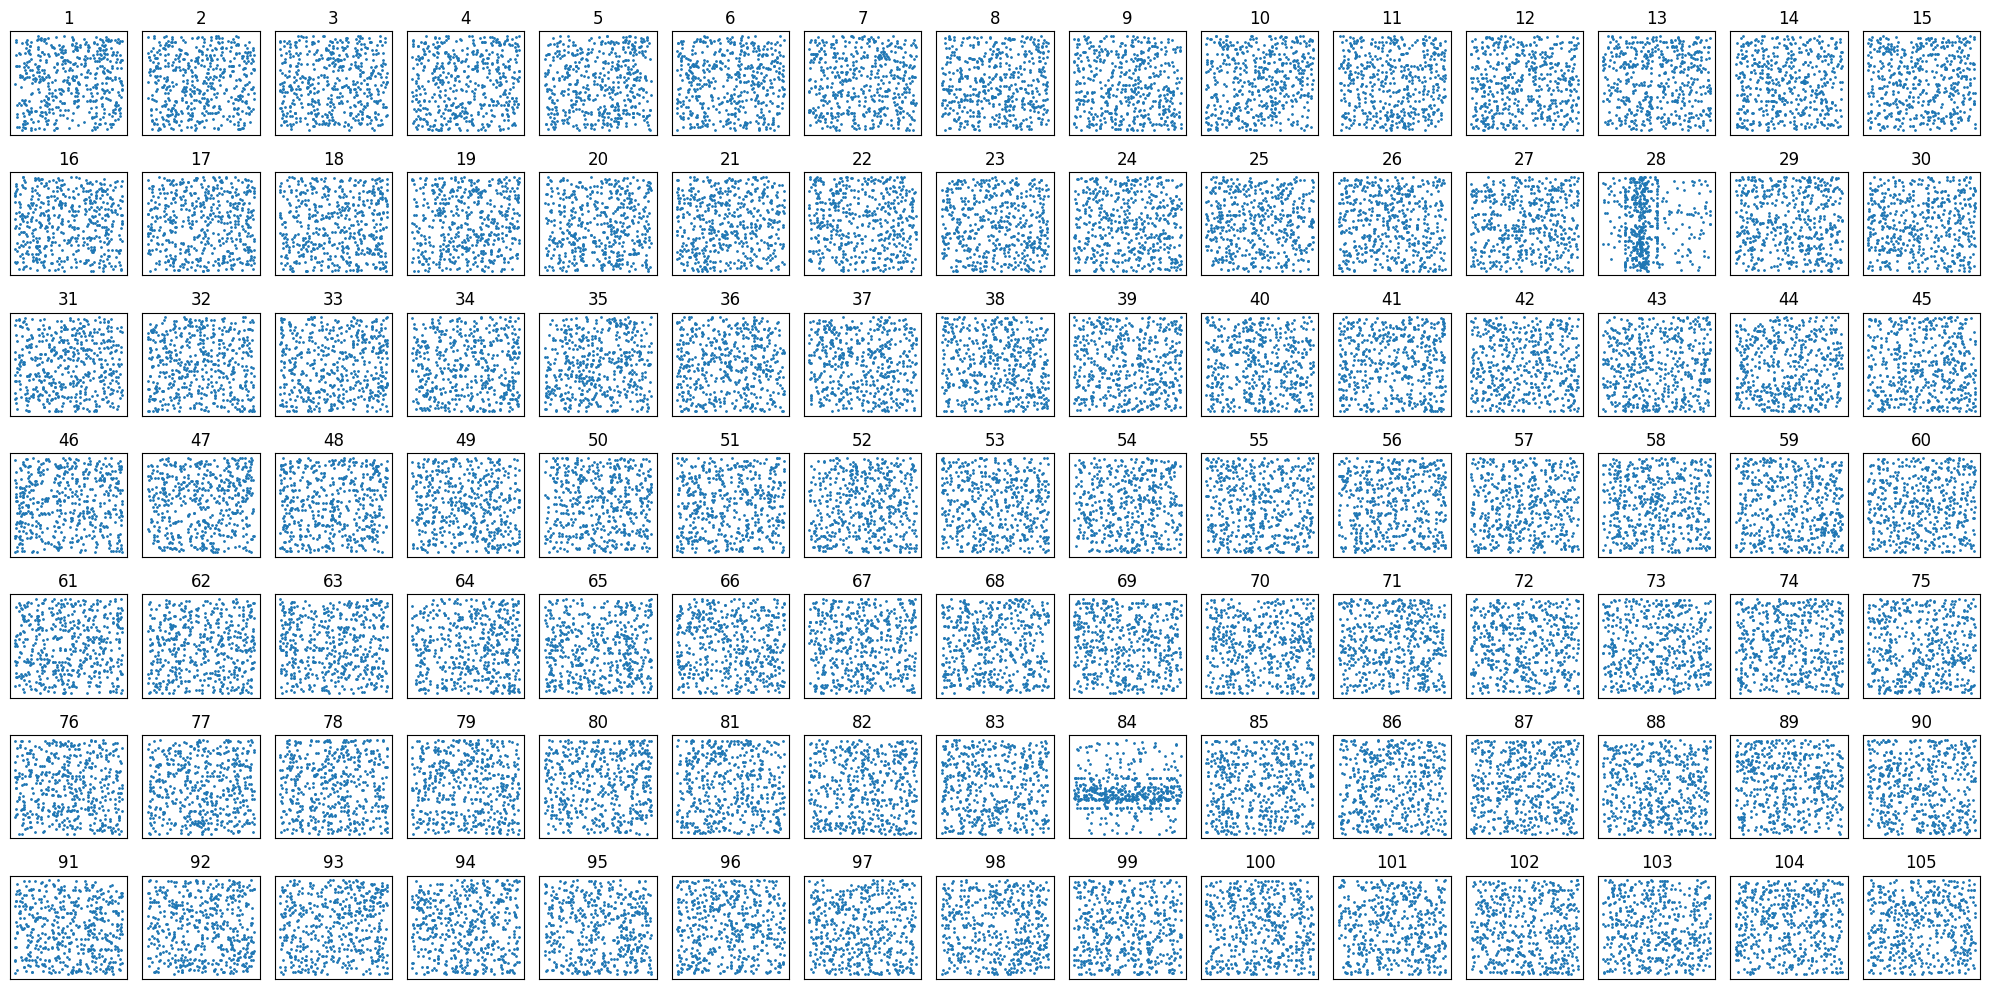

In [ ]:
fig, axs = plt.subplots(7,15,figsize=(20,10))
states=np.array([[int(num[0]), ht-int(num[1])-1, int(num[2]),-int(num[3])] for num in [re.findall('-?\d+\.?\d*',inistate[i]) for i in range(len(inistate))]])
for i in range(7):
  for j in range(15):
    t=i*15+j+1
    x=(states[:,0] + t*states[:,2])%wt
    y=(states[:,1] + t*states[:,3])%ht
    axs[i,j].set(xticks=[], yticks=[])
    axs[i, j].scatter(x,y,s=1)
    axs[i, j].set_title(f"{t}")

fig.tight_layout()

7603


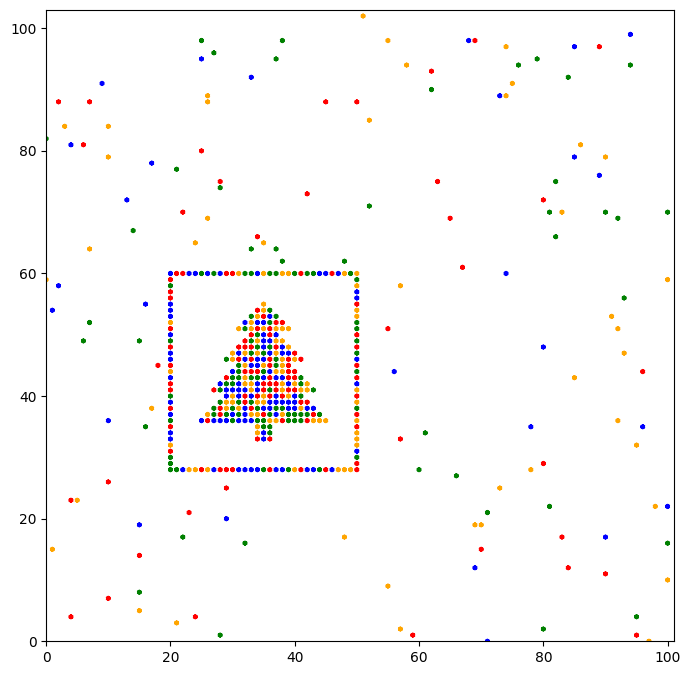

In [ ]:
x=[]
y=[]
t=2800%101 * 103 + 84
for i in range(len(inistate)):
  num=re.findall('-?\d+\.?\d*',inistate[i])
  states=[int(num[0]), ht-int(num[1])-1, int(num[2]),-int(num[3])]
  x+=[(states[0]+t*states[2])%wt]
  y+=[( states[1]+t*states[3])%ht]
print(t)
plt.figure(figsize=(8.1,8.2))
plt.xlim(0,wt)
plt.ylim(0,ht)
plt.scatter(x,y,s=8,marker="$\u2744$",color=['red','green','blue','orange']*125)
plt.show()

### Day 15

For part 2, pushing in horizonal direction remains mostly the same as part1, and for vertical direction, we need to consider left and right directions in front.

In [ ]:
# @title
map='''
'''.split('\n')[1:]

moves='''
'''.split('\n')[1:]


In [ ]:
s_time = time.time()
moves=''.join(moves)
currentmap=dict()
for i in range(len(map)):
  for j in range(len(map[0])):
    if map[i][j]=='@':
      pos=np.array([i,j])
      currentmap[(i,j)]='.'
      #print(pos)
    else:
      currentmap[(i,j)]=map[i][j]

d=dict({'v':(1,0),'<':(0,-1),'^':(-1,0),'>':(0,1)})

def movingv(ps=None, d=None): #ps is list of np.array
  n=[np.array(p)+d+0 for p in ps]
  if all([currentmap[tuple(k)] == '.' for k in n]):
    return True
  elif any([ currentmap[tuple(k)] == '#' for k in n] ):
    return False
  else:
    n2=set()
    for i in [ k + (0,2*(currentmap[tuple(k)] == '[')-1) for k in n if currentmap[tuple(k)] != '.'] + n:
      if currentmap[tuple(i)] != '.':
        n2|={tuple(i)}
    n2=list(n2)
    #print(n2)
    if movingv(n2,d):
      for i in n2:
        currentmap[tuple(np.array(i)+d)],currentmap[tuple(i)] = currentmap[tuple(i)],currentmap[tuple(np.array(i)+d)]
      return True
    else:
      return False



def movingh(p=None, d=None):
  n=p+d+0
  if currentmap[tuple(n)] == '.':
    return True
  elif currentmap[tuple(n)] == '#':
    return False
  else:
    if movingh(n,d):
      currentmap[tuple(n+d)],currentmap[tuple(n)] = currentmap[tuple(n)],currentmap[tuple(n+d)]
      return True
    else:
      return False


for m in moves:
  if movingh(pos,d[m]):
    pos=pos+d[m]

c=0
for i in currentmap:
  if currentmap[i]=='O':
    c+=100*i[0]+i[1]

print("Part 1: " f'{  c  }' )

currentmap=dict()
for i in range(len(map)):
  for j in range(len(map[0])):
    if map[i][j]=='O':
      currentmap[(i,2*j)],currentmap[(i,2*j+1)]='[]'
    elif map[i][j]=='@':
      pos=np.array([i,2*j])
      currentmap[(i,2*j)],currentmap[(i,2*j+1)]='..'
      #print(pos)
    else:
      currentmap[(i,2*j)],currentmap[(i,2*j+1)]=map[i][j],map[i][j]


for m in moves:
  if m in '^v':
    if movingv([pos],d[m]):
      pos=pos+d[m]
  else:
    if movingh(pos,d[m]):
      pos=pos+d[m]

c=0
for i in currentmap:
  if currentmap[i]=='[':
    c+=100*i[0]+i[1]

print("Part 2: " f'{  c  }' )
print("spent time : {0}s".format(time.time() - s_time))

Part 1: 1577255
Part 2: 1597035
spent time : 1.1784029006958008s


### Day 16

Tried a few different ways to stored the grid coordinate data, and ultimately decide to use a base-n number (n = len() of input). For part 2, I looped backward the optimal path repeatedly to find other branching optimal path until no new paths are added.

In [62]:
# @title
maze='''
'''.split('\n')[1:]

In [61]:
#632 too low 688 too high 703
#correct answer 703 - 33 = 670

# Visualization::::

# path={(i//len(maze),i%len(maze)) for i in path}
# visual=[]
# for i in range(len(maze)):
#   v=[]
#   for j in range(len(maze[0])):
#     if (i,j) in path:
#       v+=['O']
#     else:
#       v+=[maze[i][j]]
#   visual+=[v]
# for i in range(len(visual)):
#   print(''.join(visual[i]))

s_time = time.time()
coordhash=lambda ij: ij[0]*len(maze) + ij[1] #assuming square map
S=coordhash((len(maze)-2,1))
E=coordhash((1,len(maze)-2))


front=[(S,0)] #coordhash, steps
came_from=dict()
cost_so_far=dict()
came_from[S]=S-1 # facing east
cost_so_far[S]=0

while front:
  current=front.pop(0)

  for j in [len(maze),-len(maze),1,-1]:
    next = j+current[0]
    if maze[next//len(maze)][next%len(maze)] != '#' and  j != (came_from[current[0]])-current[0] :
      new_cost = cost_so_far[current[0]] + 1 + 1000 * ( (current[0]-came_from[current[0]]) != j)

      try:
        if new_cost < cost_so_far[next]:
          cost_so_far[next] = new_cost
          front+=[(next,current[1]+1)]
          came_from[next]=current[0]

      except:
        cost_so_far[next] = new_cost
        front+=[(next,current[1]+1)]
        came_from[next]=current[0]


  front = sorted(front, key=lambda x: x[1])

print("Part 1: " f'{  cost_so_far[E]  }' )
###################################################################################
path=[E,came_from[E]] #list of [a,b....] a=key[(i,j)]
front=[came_from[E]]
while path[-1] != S:
  path+=[came_from[path[-1]]]

c=0
while c != len(path):
  c=len(path)
  for i in range(1,len(path)):
    current=path[i]
    for j in current + np.array([len(maze),-len(maze),1,-1]):
      if j not in path and j in cost_so_far :
        if cost_so_far[path[i-1]] == cost_so_far[j] + 2 + 1000*(current-j != path[i-1] - current) :
          new=[j]
          t=came_from[j]
          while t not in path:
            new+=[t]
            t=came_from[t]
          path+=new

print("Part 2: " f'{  len(path)  }' )


print("spent time : {0}s".format(time.time()- s_time))

Part 1: 147628
Part 2: 670
spent time : 0.67547607421875s


### Day 17

Maybe using class and writing all the functions out in part 1 is unnecessary. For part 2, the key insight is that each cycle of the routine only consider 3 bits chunck of the number, so a recursive search backward from the last input should do the trick. My solution only works for my specific input.

In [ ]:
Regi_A=''
input=''

In [ ]:
s_time = time.time()

class chrono_cpu:
  def __init__(self, program=None):
    self.abc=[0,0,0]
    self.program=program.split(',')
    self.opcode=dict(zip('01234567',['self.adv','self.bxl','self.bst','self.jnz','self.bxc','self.out','self.bdv','self.cdv']))
    self.output=[]
    self.combo=lambda x: x if x <=3 else self.abc[x-4]

  def adv(self,code=None):
    self.abc[0]=self.abc[0] >> self.combo(code)
    return

  def bxl(self,code=None):
    self.abc[1]=self.abc[1] ^ code
    return

  def bst(self,code=None):
    self.abc[1]=self.combo(code) & 7
    return

  def jnz(self, code=None):
    if self.abc[0] and self.pointer != code:
      self.pointer=code
    else:
      self.pointer+=2
    return

  def bxc(self, code=None):
    self.abc[1]=self.abc[1] ^ self.abc[2]
    return

  def out(self, code=None):
    self.output+=[str(self.combo(code) & 7)]
    return

  def bdv(self, code=None):
    self.abc[1]=self.abc[0] >> self.combo(code)
    return

  def cdv(self, code=None):
    self.abc[2]=self.abc[0] >> self.combo(code)
    return

  def run(self,a=None):
    self.abc=[a,0,0]
    self.pointer=0
    self.output=[]
    while self.pointer <= len(self.program)-2:
      if self.program[self.pointer] == '3':
        self.jnz( int(self.program[self.pointer+1]) )
        #print(self.output,self.pointer)
        continue
      else:
        eval(self.opcode[self.program[self.pointer]])(int(self.program[self.pointer+1]))
        self.pointer+=2
      #print(self.output,self.pointer)
    return (','.join(self.output))



program=[int(i) for i in input.split(',')[::-1]]

def bitops(start=None,stage=0):
  global program

  x=np.arange(start,start+8) & 7
  x=( (np.arange(start,start+8) >> (x^2) ) ^ (x ^ 1)) & 7 # only works for my specific input

  for k in range(8):
    if x[k] == program[stage]:
      if stage+1 >= len(program):
        yield start + k
      else:
        yield from bitops((start + k) << 3,stage+1)
  return

A=chrono_cpu(input)
print('part 1:',A.run(Regi_A))

res=min(bitops(1,0))
print('part 2:',res)

print("spent time : {0}s".format(time.time()- s_time))

part 1: 3,7,1,7,2,1,0,6,3
part 2: 37221334433268
spent time : 0.019785165786743164s


### Day 18

I convert the input into standard matrix coordinates. For part 1, I used the standard Dijkstra's algorithm to find the path to the exit. For part 2, the byte that blocks off the exit will be the one that connects the top-right and bottom-left edges of the memory space. I represent the coordinate as a base-73 number because of the given size in addtion to the added padding.

In [ ]:
# @title
obs='''
'''.split('\n')[1:]

for i in range(len(obs)):
  obs[i] = tuple([ int(j) for j in obs[i].split(',')][::-1])

obs1=set(obs[:1024])

In [ ]:
s_time = time.time()
S=(0,0)
E=(70,70)

d= lambda t: [(0,1),(1,0),(0,-1),(-1,0)][t]

front=[S] #key
came_from=dict()
cost_so_far=dict(zip(iter.product(range(71),range(71)) , [9999]*(71)**2 ))
came_from[S]=0 #0,1,2,3 index of {(0,1),(1,0),(0,-1),(-1,0)}
cost_so_far[S]=0

while front:
  current=front.pop(0)

  if current == E:
    break

  for j in {(0,1),(1,0),(0,-1),(-1,0)} - {d( (came_from[current]-2)%4 )}:

    if all(np.array(current)+j >=0) and all(np.array(current)+j <= 70):
      next = tuple(np.array(current)+j)
    else:
      continue

    if next not in obs1:
      new_cost = cost_so_far[current] + 1
      if new_cost < cost_so_far[next]:
        cost_so_far[next] = new_cost
        front+=[next]
        came_from[next]= [(0,1),(1,0),(0,-1),(-1,0)].index(j)

print("Part 1: " f'{ cost_so_far[E]  }' )

##################################################################################

topright=set(np.arange(2,72) + 73) | set(np.arange(1,71)*73+71)
bottomleft=set(np.arange(2,72)*73 + 1) | set(np.arange(1,71)+73*71)
other=set()
s=np.dot(np.array([[0,1],[1,0],[0,-1],[-1,0],[1,1],[-1,-1],[-1,1],[1,-1]]), np.array([73,1]) )

for i in obs:
  x=np.dot(i+np.array([1,1]), np.array([73,1]) )

  if x in topright & bottomleft:
    print("Part 2: " f'{ i[::-1]  }' )
    break

  if x in topright:
    topright-={x}
    topright|=set(x+s)

    while topright & other:
      for j in topright & other:
        other-={j}
        topright-={j}
        topright|=set(s+j)

  elif x in bottomleft:
    bottomleft-={x}
    bottomleft|=set(s+x)

    while bottomleft & other:
      for j in bottomleft & other:
        other-={j}
        bottomleft-={j}
        bottomleft|=set(j+s)
  else:
    other|={x}

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 382
Part 2: (6, 36)
spent time : 0.6877007484436035s


### Day 19

This problem reminds me of the Change-making problem, so I use one of the technique of memorization to get part 2.

In [ ]:
# @title
towels=''' '''.split(', ')
designs='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

res=0
possible=0
for k in designs:
  variant=[1] #list of int, with element is number of possible combinations of i letters
  s=''
  for i in range(len(k)-1,-1,-1):
    c=0
    s=k[i]+s
    for j in towels:
      if s.startswith(j):
        c+= variant[len(s)-len(j)]
    variant+=[c]
    if len(s)==10 and not any(variant[1:]):
      break
  if variant[-1]:
    possible+=1
    res+=variant[-1]

print("Part 1: " f'{  possible  }' )
print("Part 2: " f'{  res  }' )

print("spent time : {0}s".format(time.time() - s_time))

Part 1: 371
Part 2: 650354687260341
spent time : 1.3867261409759521s


### Day 20

The racetrack has only one way. For part 2, I search for cheats within 20 unit distance for every step from start to end. Mainly used matrix and vectorization to speed things up a bit. There might be a faster way for part 2.

In [ ]:
# @title
map='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
map_mat=np.ones([len(map)+2*19,len(map[0])+2*19],dtype=np.int32)*(-10000)

for i in range(19,len(map_mat)-19):
  for j in range(19,len(map_mat)-19):
    if map[i-19][j-19] != '#':
      if map[i-19][j-19] == 'S':
        S=[np.array([i,j])]
        map_mat[i][j]=0
        #print('S:',S[-1])
        continue
      elif map[i-19][j-19] == 'E':
        E=(i,j)
        #print('E:',E)
      map_mat[i][j]=10000


d= np.array([[0,0,-1,1],[1,-1,0,0]])
c=0
while tuple(S[-1]) != E:
  s=d+np.outer(S[-1],[1,1,1,1])
  i=np.argwhere(map_mat[s[0],s[1]]>map_mat[S[-1][0],S[-1][1]])[0][0]
  c+=1
  S+=[S[-1]+d[:,i]]
  map_mat[S[-1][0],S[-1][1]]=c

skip=np.array([[-1,0,1,2],[1,2,1,0]])
c=0
for i in range(len(S)):
  s=skip+np.outer(S[i],[1,1,1,1])
  x=abs(map_mat[s[0],s[1]] - i) - 2
  c+= sum( (x >= 100) * (x <= 9452) ) #sum( abs((abs(map_mat[s[0],s[1]] - i) - 2) - 4776) <= 4676)
print("Part 1: " f'{  c  }' )

##################################################################################

kernl=[0]*19
for i in range(1,21):
  kernl += [i]*(2*(20-i)+1)
kernl=[kernl,list(range(2,21))]
for i in range(1,21):
  kernl[1] += list(range(i-20,20-i+1))
kernl= np.array(kernl)
dist=sum(abs(kernl))

c=0
for i in range(len(S)):
  s=kernl+np.outer(S[i],[1]*len(kernl[0]))
  x=abs(map_mat[s[0],s[1]] - i) - dist
  c+= sum( (x >= 100) * (x <= 9452) ) #sum( abs((abs(map_mat[s[0],s[1]] - i) - 2) - 4776) <= 4676)
print("Part 2: " f'{  c  }' )


print("spent time : {0}s".format(time.time()- s_time))

Part 1: 1524
Part 2: 1033746
spent time : 4.283146619796753s


### Day 21

I use different dictionaries to record the minimum number of step needed for going from one key to another, and doing so makes part 2 a simple recursion problem. For the empty spot, I just write out the special cases.

In [ ]:
code='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

dpad={'A':(0,2),'^':(0,1),'<':(1,0),'v':(1,1),'>':(1,2)}
numpad=dict(zip(['7','8', '9', '4', '5', '6', '1', '2', '3','','0','A'] ,
                iter.product(range(4),range(3))))

dpad_dist=dict()
for j in iter.product('<^>vA',repeat=2):
  dpad_dist[''.join(j)]=sum(abs( np.array(dpad[j[1]]) - np.array(dpad[j[0]]) )) +1

def dp2dp(d=None): # d = min # of moves on dpads to dpads {'<A': #.....}
  special={'A<':'<<v', '<A':'^>>','<^':'^>','^<':'<v'}
  dpad_moves=dict()

  for j in iter.product('<^>vA',repeat=2):
    j=''.join(j)
    a,b = np.array(dpad[j[1]]) - np.array(dpad[j[0]])

    S=set(iter.permutations( ['^','v'][bool(a > 0)]*abs(a) + ['<','>'][bool(b > 0)]*abs(b) ))
    S = S - {tuple( special[j] if j in special else [] )}
    if S:
      dpad_moves[j] = min([ sum( [ d[''.join(k)] for k in iter.pairwise('A'+''.join(i)+'A')] )  for i in S])
    else:
      dpad_moves[j] = 1
  return dpad_moves

d= dp2dp(dpad_dist)


def num2dp(st=None):
  i,j = np.array(numpad[st[1]]) - np.array(numpad[st[0]])
  return ['^','v'][bool(i > 0)]*abs(i) + ['<','>'][bool(j > 0)]*abs(j)

special=dict(zip( [''.join(i) for i in iter.product(['1','4','7'],['0','A'])] , ['v>','v>>','vv>','vv>>','vvv>','vvv>>']  ))
special|=dict(zip( [''.join(i) for i in iter.product(['0','A'],['1','4','7'])] , ['<^','<^^','<^^','<<^','<<^^','<<^^^']  ))

numpad_moves=dict()
for j in iter.product('0123456789A',repeat=2):
  j=''.join(j)
  S=set(iter.permutations(num2dp(j))) - {tuple( special[j] if j in special else [] )}
  if S:
    numpad_moves[j] = min([ sum([ d[''.join(k)] for k in iter.pairwise( ('A',)+i +('A',) ) ]) for i in S ]  )
  else:
    numpad_moves[j] = 1
res=0
for i in code:
  r=0
  for l in iter.pairwise('A'+i):
    r+= numpad_moves[''.join(l)]
  #print(int(i[:-1]),r)
  res+=r*int(i[:-1])
print("Part 1: " f'{  res  }' )

################################################################
for _ in range(23):
  d= dp2dp(d)

numpad_moves=dict()
for j in iter.product('0123456789A',repeat=2):
  j=''.join(j)
  S=set(iter.permutations(num2dp(j))) - {tuple( special[j] if j in special else [] )}
  if S:
    numpad_moves[j] = min([ sum([ d[''.join(k)] for k in iter.pairwise( ('A',)+i +('A',) ) ]) for i in S ]  )
  else:
    numpad_moves[j] = 1
res=0
for i in code:
  r=0
  for l in iter.pairwise('A'+i):
    r+= numpad_moves[''.join(l)]
  #print(int(i[:-1]),r)
  res+=r*int(i[:-1])

print("Part 2: " f'{  res  }' )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 202648
Part 2: 248919739734728
spent time : 0.03682255744934082s


### Day 22

For part 1, the whole process can be treated as one matrix multiplication on a binary number. To get the nth secret number we just have to raise the matrix to the nth power. For part 2, I choose to encode the four consective difference as a 4 digit base-19 number because of the possible digits ranging from -9 to 9.

In [ ]:
# @title
secret='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
A=np.array([[0]*24]*24)
for i in range(0,6):
  A[i][i]=1
for i in range(6,24):
  A[i][[i,i-6]]=1

B=np.array([[0]*24]*24)
for i in range(0,19):
  B[i][[i,i+5]]=1
for i in range(19,24):
  B[i][i]=1


C=np.array([[0]*24]*24)
for i in range(0,11):
  C[i][i]=1
for i in range(11,24):
  C[i][[i,i-11]]=1

T=np.matmul(np.matmul(C,B),A)%2
Tf=np.linalg.matrix_power(T,2000)%2

c=0
for i in range(len(secret)):
  r=(Tf.dot([int(k) for k in format(int(secret[i]),'b').zfill(24)[::-1] ]))%2 #Binary format, flipped ordered 2^0, 2^1 ....., 2^23
  c+=sum([2**j for j in range(24) if r[j]])

print("Part 1: " f'{  c  }' )
################################################################################

def f(x=None, m=(2 << 23) - 1):
  x=((x << 6) ^ x) & m
  x=((x >> 5) ^ x)
  return ((x << 11) ^ x) & m

def run() -> None:
  m=(2 << 23) - 1
  ncode=np.array([int(i) for i in secret])
  pcode=ncode%10
  df=np.zeros(len(pcode),dtype=np.int32)
  seq_sell=np.zeros([len(pcode),19**4],dtype=np.int32)

  for i in range(2000):
    ncode=f(ncode)
    df = (df*19 + ncode%10 - pcode + 9)% (19**4)
    pcode=ncode%10

    if i >=3:
      c=seq_sell[np.arange(2313),df]
      seq_sell[np.arange(2313),df]=np.where(c,c,pcode)

  print("Part 2: " f'{  max(sum(seq_sell))  }' )

run()

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 19458130434
Part 2: 2130
spent time : 3.885549306869507s


### Day 23

Learned about cliques finding algorithm while doing this one. For part 2, I looked up the Bron–Kerbosch algorithm and tried to implement it myself, but it might not be need since I notice every computer is connected to 13 other computers which it could be exploited.

In [ ]:
# @title
connections='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

grph=dict() #{nam1 : {nam2,nam3...}}
c=0
tris=dict() #{sorted(nam1,name2) : int}
for i in connections:
  edge=tuple(sorted(i.split('-')))
  if edge in tris:
    c+=tris[edge]

  for k in [0,1]:

    if edge[k] in grph:
      for j in grph[edge[k]]:
        if 't' in j[0] or any([ 't' in x[0] for x in edge]):
          if tuple(sorted(  (edge[k^1],j)  )) not in tris:
            tris[  tuple(sorted(  (edge[k^1],j)  ))  ]=1
          else:
            tris[ tuple(sorted(  (edge[k^1],j)  ))  ]+=1
        else:
          pass

      grph[edge[k]]|={edge[k^1]}
    else:
      grph[edge[k]]={edge[k^1]}
# R=a clique that contain x, P= potential vertices, X=exclude vertices

grph['']=set()
def maxclique(R=None, P=None, X=None):
  if P or X:
    ################### choosing a pivot with largest intersection
    u=''
    for k in P|X:
      if len((P|X)&grph[k])>len(u):
        u=k
    ###################
    for _ in range(len(P-grph[u])):
      v=P.pop()
      yield from maxclique(R|{v},P&grph[v],X&grph[v])
      X|={v}
  else:
    yield R
m=''
for k in maxclique(set(),set(grph.keys()),set()):
  if len(k)>len(m):
    m=k

print("Part 1: " f'{  c  }' )
res=','.join(sorted(m))
print("Part 2: " f'{  res  }' )

print("spent time : {0}s".format(time.time() - s_time))

Part 1: 1284
Part 2: bv,cm,dk,em,gs,jv,ml,oy,qj,ri,uo,xk,yw
spent time : 0.14839386940002441s


### Day 24

For part 2, the key insight for me is that the conventional bitwise addition can be view as:  z_n = A XOR B, where A is the "carried over" term, A= z_(n-1) or some functions of (x00, x01,...x_n-1, y00, y01,...y_n-1) and B is the digit term, B= x_n XOR y_n. So finding which gates to swap becomes finding the gates that deviates from the convention.

In [ ]:
# @title
part_1='''
'''.split('\n')[1:]

part_2='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()

class add_calc:
  def __init__(self,L=None,base=None):
    self.logic=L | dict() #dict= {'aaa': ['x01','^','ccc'],....

  def swap(self,SW=None): #SW=[['z01','abc'],[  ].......]
    for i in SW:
      self.logic[i[0]],self.logic[i[1]]=logic[i[1]],logic[i[0]]
    return

  def instruct(self,exp=None):
    res=''
    x=self.logic[exp]
    if x[0] in base:
      res+='(base[' '"' f'{x[0]}' '"' ']'
    else:
      res+='('+self.instruct(x[0])

    res+= x[1]

    if x[2] in base:
      res+= 'base[' '"' f'{x[2]}' '"' '])'
    else:
      res+=self.instruct(x[2]) + ')'
    return res

  def out(self):

    self.gates=dict()
    for i in self.logic:
      self.gates[i]=self.instruct(i)
    res=[]
    for i in range(46):
      res+=[str(  eval( self.gates['z'+str(i).zfill(2)] )  )]
    return res

  def adding(self):
    s=[]
    carry=0
    for i in range(45):
      x, y = int(base['x'+str(i).zfill(2)]), int(base['y'+str(i).zfill(2)])
      s+=[str(( x + y   + carry)%2)]
      carry=(x+y+carry)//2
    if carry:
      s+=['1']
    else:
      s+=['0']
    return s

base=dict()
for i in part_1:
  x=i.split(': ')
  base[x[0]]=int(x[1])

logic=dict()
logic_complement=dict()
op=dict({'AND':' & ','OR':' | ','XOR':' ^ '})

for i in part_2:
  a=i.split(' ')
  logic[a[-1]] = [a[0], op[a[1]] , a[2]]
  for j in [a[0],a[2]]:
    if j not in logic_complement:
      logic_complement[j]={a[-1]}
    else:
      logic_complement[j].add(a[-1])

A=add_calc(logic,base).out()
A=int(''.join(A[::-1]),2)

print( "Part 1: " f'{ A }' )

#'z_n' should be depended on {'x00','x01',....'x_n', 'y00','y01'...}
# 'z_n' = A XOR B where A=f({x00,x01....x_n-1,y00....}) (or z_n-1), B== x_n XOR y_n
#In order to check each 'z_n' is correct, check for XOR of A, B and OR and XOR on each inputs.

for i in range(1,45): #omit the first and last z terms
  x= logic['z'+str(i).zfill(2) ]
  t=set({'x'+str(i).zfill(2) , ' ^ ', 'y'+str(i).zfill(2)})
  if ' ^ ' not in x :
    print('z'+str(i).zfill(2))
    for k in logic_complement['x'+str(i).zfill(2)]:
      if ' ^ ' in set(logic[k]):
        print('Swap with: ', [ j for j in logic_complement[k] if ' ^ ' in set(logic[j]) ] ) #swap with gate with A XOR B for some B= X_N XOR Y_N
  elif  ( (t - set(logic[x[0]])) and (t-set(logic[x[2]]))  ) :
    print(x[0],x[2])
    print('Swap with: ',[ k for k in logic_complement['x'+str(i).zfill(2)] if ' ^ ' in set(logic[k]) ])


print( "Part 2: " 'css,cwt,gdd,jmv,pqt,z05,z09,z37' )
print("spent time : {0}s".format(time.time()- s_time))

Part 1: 61495910098126
z05
Swap with:  ['gdd']
z09
Swap with:  ['cwt']
vch css
Swap with:  ['jmv']
z37
Swap with:  ['pqt']
Part 2: css,cwt,gdd,jmv,pqt,z05,z09,z37
spent time : 0.03807663917541504s


### Day 25

In [ ]:
# @title
keylock='''
'''.split('\n')[1:]

In [ ]:
s_time = time.time()
keys=[]
locks=[]
for i in range(0,len(keylock),8):
  pins=[0]*5
  for j in range(7):
    pins+= np.array(list( keylock[i+j] )) == '#'

  if '#' in keylock[i]:
    locks+=[pins]
  else:
    keys+=[pins]

c=0
for i in keys:
  for j in locks:
    if all(i+j <=7):
      c+=1

print("Part 1: " f'{ c }' )
print("Part 2: " )

print("spent time : {0}s".format(time.time()- s_time))

Part 1: 3451
Part 2: 
spent time : 0.3222379684448242s
